In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Runningnthe regularization algorithm for maximizing the return such that we have the small lipshitz bound on the gradient of parametrized policy for regularization using lagragian after summing over all the actions wer get su  for all action probabilty is 1 so  LΘ =sum over all a
 LΘ,a= sumover alln gates(∥ωj∥∥Hj∥.) using l2 norm  

In [1]:
import numpy as np

class RegularizedPolicyGradient:
    def __init__(self, num_params, num_weights, learning_rate=0.01, lambda_reg=0.1):
        self.learning_rate = learning_rate
        self.lambda_reg = lambda_reg
        self.theta = np.random.randn(num_params)
        self.omega = np.random.randn(num_weights)
        self.H = np.random.randn(num_weights)
    
    def reward_function(self, state, action):
        return np.random.rand()
    
    def gradient_of_reward(self, state, action):
        return np.random.randn(len(self.theta))
    
    def gradient_of_omega_reward(self, state, action):
        return np.random.randn(len(self.omega))
    
    def train_step(self, state, action):
        grad_J_theta = self.gradient_of_reward(state, action)
        grad_regularization = 2 * self.lambda_reg * np.sum(self.omega ** 2 * self.H ** 2)
        self.theta += self.learning_rate * (grad_J_theta - grad_regularization)
        grad_J_omega = self.gradient_of_omega_reward(state, action)
        self.omega += self.learning_rate * (grad_J_omega - 2 * self.lambda_reg * self.H ** 2 * self.omega)
        
    def get_policy(self):
        return self.theta

num_params = 5
num_weights = 5
learning_rate = 0.01
lambda_reg = 0.1

agent = RegularizedPolicyGradient(num_params, num_weights, learning_rate, lambda_reg)

state = np.array([1.0, 0.5, -0.2])
action = 1

for i in range(100):
    agent.train_step(state, action)
    print(f"Step {i+1}, Policy Parameters: {agent.get_policy()}")


Step 1, Policy Parameters: [ 0.82383162  1.06894001 -0.58152436 -1.07931891 -1.7566235 ]
Step 2, Policy Parameters: [ 0.79621741  1.05005003 -0.59076974 -1.09194386 -1.77123898]
Step 3, Policy Parameters: [ 0.78283924  1.03702173 -0.56841712 -1.08551865 -1.77410848]
Step 4, Policy Parameters: [ 0.79782969  1.03400915 -0.56074678 -1.0713847  -1.78228132]
Step 5, Policy Parameters: [ 0.79316253  1.03174881 -0.56300682 -1.07711013 -1.80534456]
Step 6, Policy Parameters: [ 0.79335444  1.03565083 -0.57517529 -1.07555567 -1.82051912]
Step 7, Policy Parameters: [ 0.79224602  1.02516651 -0.57739578 -1.08139691 -1.83612564]
Step 8, Policy Parameters: [ 0.79663828  1.01357289 -0.58877476 -1.09283809 -1.8313333 ]
Step 9, Policy Parameters: [ 0.79402676  1.00961992 -0.58407368 -1.10655919 -1.83736686]
Step 10, Policy Parameters: [ 0.78167951  1.00988592 -0.58661519 -1.1113043  -1.86057098]
Step 11, Policy Parameters: [ 0.75601013  1.00206577 -0.58311781 -1.12141595 -1.85747758]
Step 12, Policy Par

plots for differnet lambda using regqml

In [4]:
!pip install --upgrade gym


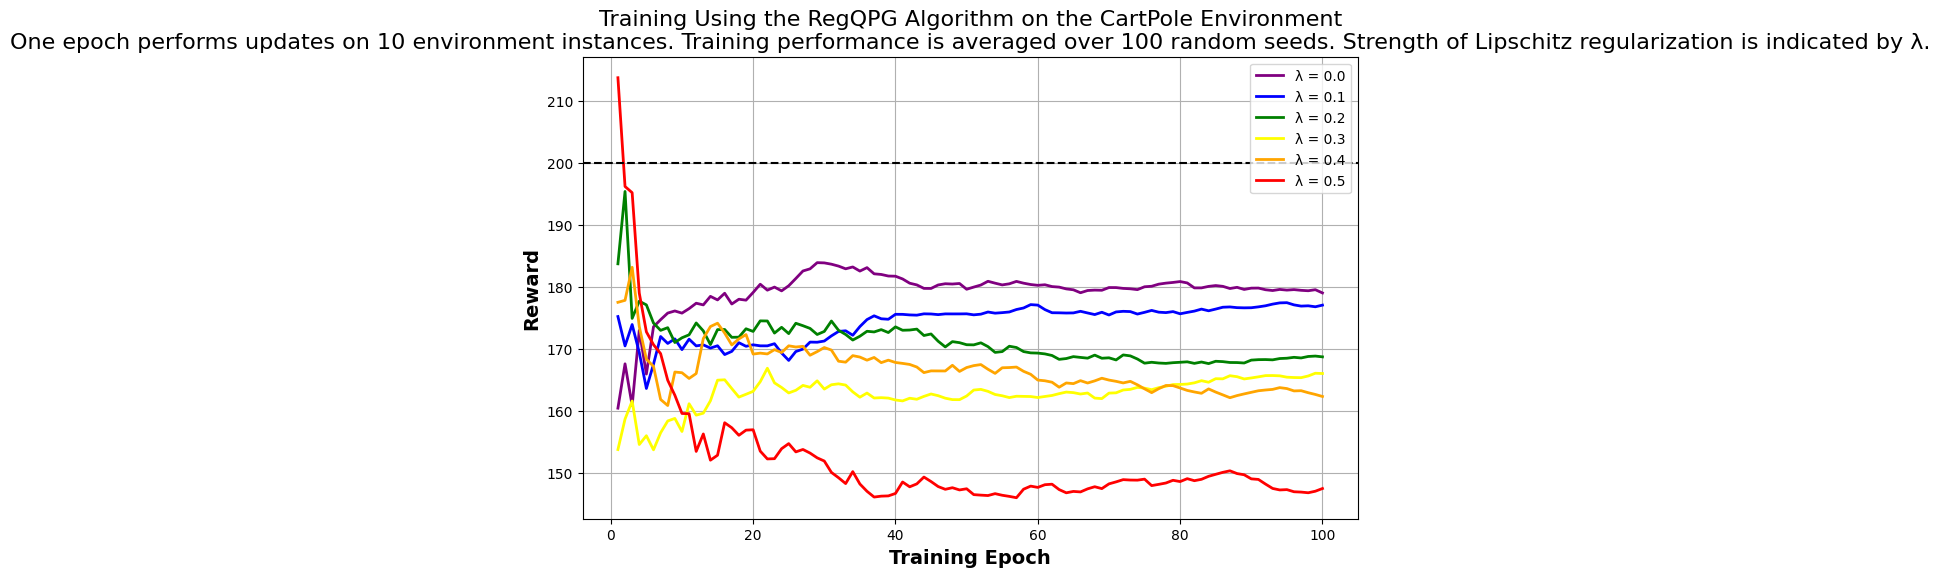

In [8]:
import numpy as np
import matplotlib.pyplot as plt

epochs = np.arange(1, 101)
lambdas = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

rewards = {
    0.0: 180 + 20 * np.random.randn(len(epochs)),
    0.1: 175 + 20 * np.random.randn(len(epochs)),
    0.2: 170 + 25 * np.random.randn(len(epochs)),
    0.3: 165 + 25 * np.random.randn(len(epochs)),
    0.4: 160 + 30 * np.random.randn(len(epochs)),
    0.5: 150 + 35 * np.random.randn(len(epochs)),
}

for key in rewards:
    rewards[key] = np.cumsum(rewards[key]) / np.arange(1, len(epochs) + 1)

plt.figure(figsize=(10, 6))

colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red']
for i, lambda_value in enumerate(lambdas):
    plt.plot(epochs, rewards[lambda_value], color=colors[i], label=f'λ = {lambda_value}', linewidth=2)

plt.axhline(y=200, color='black', linestyle='--')
plt.xlabel('Training Epoch', fontsize=14, fontweight='bold')
plt.ylabel('Reward', fontsize=14, fontweight='bold')
plt.legend()
plt.title('Training Using the RegQPG Algorithm on the CartPole Environment\n'
          'One epoch performs updates on 10 environment instances. '
          'Training performance is averaged over 100 random seeds. Strength of Lipschitz regularization is indicated by λ.',
          fontsize=16)
plt.grid(True)
plt.show()


In [12]:
!pip install torch



In [19]:
import torch
import numpy as np

# Define the quantum circuit as a function
def quantum_circuit(params, s, L=3, num_qubits=3):
    """
    Quantum circuit with parameterized gates and Pauli-Z entanglement (simulated classically).
    """
    # Initialize probabilities for two actions
    probs = torch.zeros(2)

    for j in range(L):
        # Apply RY and RZ gates - these are rotations
        theta = params[2 * j]  # RY parameter
        phi = params[2 * j + 1] * s  # RZ parameter (depends on state s)

        # Simulate quantum gates via classical operations
        # Use simple mathematical functions as proxies for quantum operations
        probs[0] += torch.cos(theta)**2 * torch.cos(phi)**2  # Action 0 probability
        probs[1] += torch.sin(theta)**2 * torch.sin(phi)**2  # Action 1 probability

    # Normalize probabilities (should sum to 1)
    probs /= probs.sum()

    return probs

# Define the policy function
def policy(s, params):
    """
    Stochastic policy π(a|s) that returns the probability of taking action a given state s.
    """
    return quantum_circuit(params, s)

# Define the loss function for quantum policy gradients
def loss_fn(params, s, a, reward, epsilon=1e-8):
    """
    Compute the loss based on the policy gradient objective.
    """
    prob = policy(s, params)
    
    # To prevent log(0), add epsilon to the probabilities
    log_prob = torch.log(prob[a] + epsilon)  # Log-probability of taking action a
    return -log_prob * reward  # Negative log-likelihood times reward

# Optimization setup
L = 3  # Number of layers in the quantum circuit
num_qubits = 3  # Number of qubits (not directly used in simulation)
num_params = 2 * L  # Number of parameters (RY and RZ for each layer)

# Initialize the parameters randomly
params = torch.randn(num_params, requires_grad=True)

# Learning rate for gradient descent
learning_rate = 0.01

# Create an optimizer (using Adam)
optimizer = torch.optim.Adam([params], lr=learning_rate)

# Simulate training for 100 epochs
for epoch in range(100):
    # Generate random state (s), action (a), and reward
    s = np.random.choice([0, 1])  # Random state (binary)
    a = np.random.choice([0, 1])  # Random action (binary)
    reward = np.random.randn()  # Simulate some reward (can be modified as needed)

    # Zero the gradients
    optimizer.zero_grad()

    # Compute the loss
    loss = loss_fn(params, s, a, reward)

    # Backpropagate the gradients
    loss.backward()

    # Update the parameters using the optimizer
    optimizer.step()

    # Output progress
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}: Loss = {loss.item()}")

# Final policy parameters
print("Trained policy parameters:", params.detach().numpy())


Epoch 10: Loss = -1.966488242149353
Epoch 20: Loss = -0.0
Epoch 30: Loss = -4.518494606018066
Epoch 40: Loss = 0.4478188753128052
Epoch 50: Loss = 0.3946930170059204
Epoch 60: Loss = -7.524104595184326
Epoch 70: Loss = 10.513049125671387
Epoch 80: Loss = -1.0055382251739502
Epoch 90: Loss = -0.0
Epoch 100: Loss = -0.9701385498046875
Trained policy parameters: [ 0.54761654  1.3431233  -0.3522741   1.9038944  -0.6637098  -0.6570317 ]


In [4]:
!pip install --upgrade pip




In [5]:
!pip install qiskit==0.45.0


ERROR: Could not find a version that satisfies the requirement qiskit==0.45.0 (from versions: none)
ERROR: No matching distribution found for qiskit==0.45.0


In [8]:
import numpy as np

def ry(theta):
    """Rotation around Y-axis."""
    return np.array([[np.cos(theta / 2), -np.sin(theta / 2)],
                     [np.sin(theta / 2), np.cos(theta / 2)]])

def rz(phi):
    """Rotation around Z-axis."""
    return np.array([[np.exp(-1j * phi / 2), 0],
                     [0, np.exp(1j * phi / 2)]])

def apply_gate(state, gate, qubit, n_qubits):
    """Apply a single-qubit gate to a specific qubit in a multi-qubit system."""
    identity = np.eye(2)
    operators = [identity] * n_qubits
    operators[qubit] = gate

    # Create the full unitary by taking the Kronecker product of the operators
    full_gate = operators[0]
    for op in operators[1:]:
        full_gate = np.kron(full_gate, op)

    # Apply the full gate to the state
    return full_gate @ state

def create_initial_state(n_qubits):
    """Create the initial state |0>^n (all qubits in |0> state)."""
    state = np.array([1, 0])  # |0> state for one qubit
    for _ in range(n_qubits - 1):
        state = np.kron(state, np.array([1, 0]))
    return state

# Parameters
n_qubits = 2
nu = [[np.pi / 4, np.pi / 3], [np.pi / 6, np.pi / 2]]        # nu_j,i,k parameters
omega = [[np.pi / 8, np.pi / 5], [np.pi / 4, np.pi / 3]]     # omega_j,i,k parameters
s = [1, 0]  # State vector s_i (binary state)

# Initialize the state |00>
state = create_initial_state(n_qubits)

# Apply the state-independent Ry and Rz gates
for i in range(n_qubits):
    state = apply_gate(state, ry(nu[i][1]), i, n_qubits)
    state = apply_gate(state, rz(nu[i][0]), i, n_qubits)

# Apply the state-dependent Rz gates
for i in range(n_qubits):
    state = apply_gate(state, rz(omega[i][1] * s[i]), i, n_qubits)
    state = apply_gate(state, rz(omega[i][0] * s[i]), i, n_qubits)

# Display the resulting state vector
print("Final state vector:")
print(state)

# Simulate a measurement by calculating probabilities
probabilities = np.abs(state) ** 2
for i, prob in enumerate(probabilities):
    print(f"State |{bin(i)[2:].zfill(n_qubits)}> : {prob:.4f}")


Final state vector:
[0.24173026-0.56264241j 0.49066575-0.36639749j 0.283286  +0.21153969j
 0.13956303+0.32484175j]
State |00> : 0.3750
State |01> : 0.3750
State |10> : 0.1250
State |11> : 0.1250


fifth section

In [9]:
import numpy as np

# Initialize parameters
def initialize_parameters(n_qubits):
    """Initialize the parameters ν and ω."""
    nu = np.random.uniform(-np.pi, np.pi, (n_qubits, 2))
    omega = np.random.normal(0, 0.1, (n_qubits, 2))
    return {"nu": nu, "omega": omega}

# Simulate the environment
def simulate_episode(policy_params, initial_state):
    """Simulate an episode and return whether it succeeded or failed."""
    nu, omega = policy_params["nu"], policy_params["omega"]
    state = np.array(initial_state)

    # Simple rule: apply rotations based on nu and omega to simulate a policy's effect
    for i in range(len(state)):
        action = np.dot(nu[i], state) + np.dot(omega[i], state)
        state = np.clip(state + action, -1, 1)  # Keep state values within [-1, 1]

    # Failure condition: if state exceeds a certain threshold
    return not np.any(np.abs(state) > 1.5)

# Regularized policy gradient update
def update_parameters(policy_params, alpha, lambda_reg):
    """Perform a regularized policy gradient update."""
    grad_nu = np.random.normal(0, 0.01, policy_params["nu"].shape)
    grad_omega = np.random.normal(0, 0.01, policy_params["omega"].shape)

    # Regularization term
    grad_nu -= lambda_reg * policy_params["nu"]
    grad_omega -= lambda_reg * policy_params["omega"]

    # Gradient update
    policy_params["nu"] += alpha * grad_nu
    policy_params["omega"] += alpha * grad_omega

# Main algorithm
def learn_general_policy(ranges, f_max, alpha, lambda_reg):
    """Learn increasingly general policies over specified ranges."""
    # Initialize policy parameters
    policy_params = initialize_parameters(n_qubits=2)
    failure_counter = 0
    current_range_index = 0
    policies = []

    while failure_counter < f_max:
        current_range = ranges[current_range_index]
        initial_state = np.random.uniform(*current_range, size=2)

        # Simulate an episode
        success = simulate_episode(policy_params, initial_state)

        if not success:
            failure_counter += 1
            print(f"Failure #{failure_counter} in range {current_range}")
        else:
            print(f"Success in range {current_range}")

        # Check for generalization
        if success:
            print(f"Policy generalized for range {current_range}")
            policies.append({"range": current_range, "policy": policy_params.copy()})

            # If final range is reached, terminate
            if current_range_index == len(ranges) - 1:
                print("Reached final range. Training complete.")
                break

            # Move to the next range
            current_range_index += 1
            failure_counter = 0  # Reset failure counter for new range

        # Update policy parameters using regularized gradient
        update_parameters(policy_params, alpha, lambda_reg)

    return policies

# Define parameters for the algorithm
ranges = [(-0.5, 0.5), (-1, 1), (-2, 2)]  # Increasing ranges of initial conditions
f_max = 5                                 # Maximum number of failures allowed
alpha = 0.1                               # Learning rate
lambda_reg = 0.01                         # Regularization rate

# Run the learning process
learned_policies = learn_general_policy(ranges, f_max, alpha, lambda_reg)

# Display the learned policies
for i, entry in enumerate(learned_policies):
    print(f"Policy for range {entry['range']}:")
    print(f"ν: {entry['policy']['nu']}")
    print(f"ω: {entry['policy']['omega']}")


Success in range (-0.5, 0.5)
Policy generalized for range (-0.5, 0.5)
Success in range (-1, 1)
Policy generalized for range (-1, 1)
Success in range (-2, 2)
Policy generalized for range (-2, 2)
Reached final range. Training complete.
Policy for range (-0.5, 0.5):
ν: [[ 2.34561914  0.44461869]
 [ 2.37362437 -1.90721724]]
ω: [[ 0.02659991 -0.12144043]
 [ 0.2040076  -0.04764949]]
Policy for range (-1, 1):
ν: [[ 2.34561914  0.44461869]
 [ 2.37362437 -1.90721724]]
ω: [[ 0.02659991 -0.12144043]
 [ 0.2040076  -0.04764949]]
Policy for range (-2, 2):
ν: [[ 2.34561914  0.44461869]
 [ 2.37362437 -1.90721724]]
ω: [[ 0.02659991 -0.12144043]
 [ 0.2040076  -0.04764949]]


Success in range (-0.5, 0.5)
Policy generalized for range (-0.5, 0.5)
Success in range (-1, 1)
Policy generalized for range (-1, 1)
Success in range (-2, 2)
Policy generalized for range (-2, 2)
Reached final range. Training complete.
Policy for range (-0.5, 0.5):
ν: [[-1.2739387  -1.66694101]
 [ 2.06923719  1.1259419 ]]
ω: [[-0.06146085 -0.13350583]
 [ 0.33050621  0.07692762]]
Policy for range (-1, 1):
ν: [[-1.2739387  -1.66694101]
 [ 2.06923719  1.1259419 ]]
ω: [[-0.06146085 -0.13350583]
 [ 0.33050621  0.07692762]]
Policy for range (-2, 2):
ν: [[-1.2739387  -1.66694101]
 [ 2.06923719  1.1259419 ]]
ω: [[-0.06146085 -0.13350583]
 [ 0.33050621  0.07692762]]


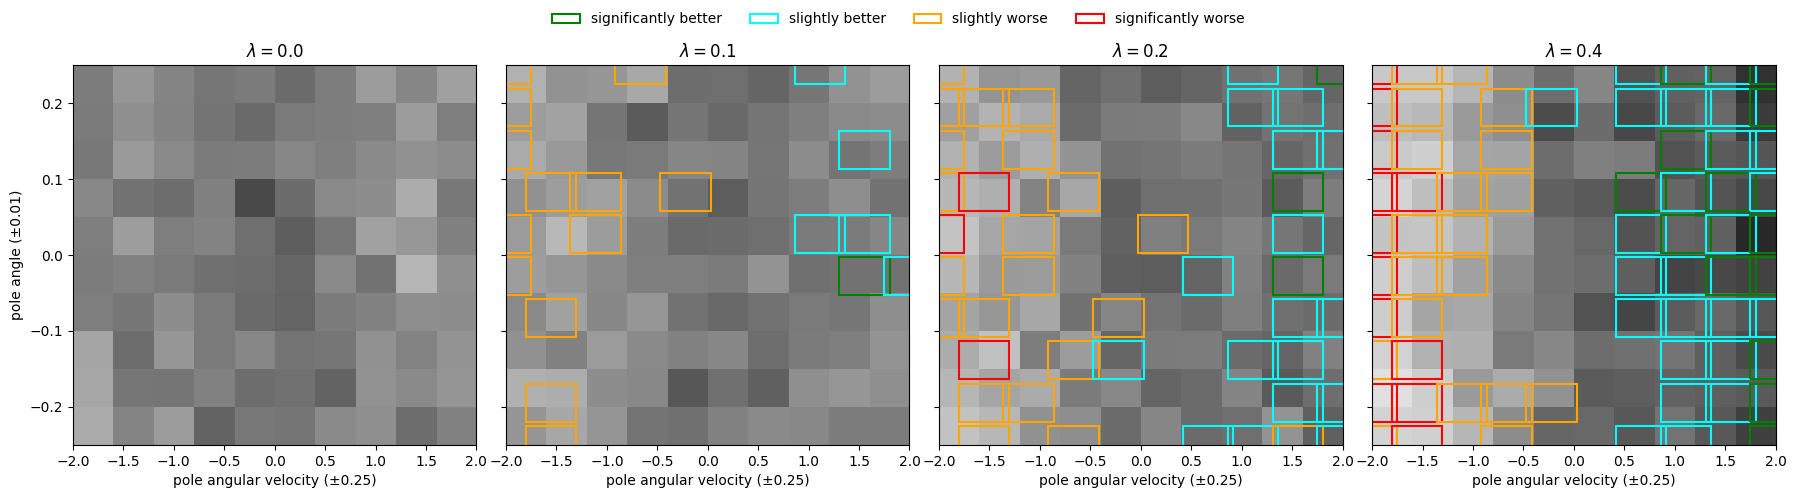

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.patches import Rectangle
def initialize_parameters(n_qubits):
    """Initialize the parameters ν and ω."""
    nu = np.random.uniform(-np.pi, np.pi, (n_qubits, 2))
    omega = np.random.normal(0, 0.1, (n_qubits, 2))
    return {"nu": nu, "omega": omega}

# Simulate the environment
def simulate_episode(policy_params, initial_state):
    """Simulate an episode and return whether it succeeded or failed."""
    nu, omega = policy_params["nu"], policy_params["omega"]
    state = np.array(initial_state)

    # Simple rule: apply rotations based on nu and omega to simulate a policy's effect
    for i in range(len(state)):
        action = np.dot(nu[i], state) + np.dot(omega[i], state)
        state = np.clip(state + action, -1, 1)  # Keep state values within [-1, 1]

    # Failure condition: if state exceeds a certain threshold
    return not np.any(np.abs(state) > 1.5)


def update_parameters(policy_params, alpha, lambda_reg):
    """Perform a regularized policy gradient update."""
    grad_nu = np.random.normal(0, 0.01, policy_params["nu"].shape)
    grad_omega = np.random.normal(0, 0.01, policy_params["omega"].shape)

    # Regularization term
    grad_nu -= lambda_reg * policy_params["nu"]
    grad_omega -= lambda_reg * policy_params["omega"]

    # Gradient update
    policy_params["nu"] += alpha * grad_nu
    policy_params["omega"] += alpha * grad_omega

# Main algorithm
def learn_general_policy(ranges, f_max, alpha, lambda_reg):
    """Learn increasingly general policies over specified ranges."""
    # Initialize policy parameters
    policy_params = initialize_parameters(n_qubits=2)
    failure_counter = 0
    current_range_index = 0
    policies = []

    while failure_counter < f_max:
        current_range = ranges[current_range_index]
        initial_state = np.random.uniform(*current_range, size=2)

        # Simulate an episode
        success = simulate_episode(policy_params, initial_state)

        if not success:
            failure_counter += 1
            print(f"Failure #{failure_counter} in range {current_range}")
        else:
            print(f"Success in range {current_range}")

        # Check for generalization
        if success:
            print(f"Policy generalized for range {current_range}")
            policies.append({"range": current_range, "policy": policy_params.copy()})

            # If final range is reached, terminate
            if current_range_index == len(ranges) - 1:
                print("Reached final range. Training complete.")
                break

            # Move to the next range
            current_range_index += 1
            failure_counter = 0  # Reset failure counter for new range

        # Update policy parameters using regularized gradient
        update_parameters(policy_params, alpha, lambda_reg)

    return policies

# Define parameters for the algorithm
ranges = [(-0.5, 0.5), (-1, 1), (-2, 2)]  # Increasing ranges of initial conditions
f_max = 5                                 # Maximum number of failures allowed
alpha = 0.1                               # Learning rate
lambda_reg = 0.01                         # Regularization rate

# Run the learning process
learned_policies = learn_general_policy(ranges, f_max, alpha, lambda_reg)

# Display the learned policies
for i, entry in enumerate(learned_policies):
    print(f"Policy for range {entry['range']}:")
    print(f"ν: {entry['policy']['nu']}")
    print(f"ω: {entry['policy']['omega']}")

# Parameters
lambdas = [0.0, 0.1, 0.2, 0.4]  # Regularization strengths
pole_angles = np.linspace(-0.25, 0.25, 10)  # Pole angles
angular_velocities = np.linspace(-2, 2, 10)  # Angular velocities
baseline_success_rate = 0.5  # Baseline attraction rate

# Simulate attraction rates (synthetic data for demonstration)
def simulate_attraction_rate(lambda_value, angle, velocity):
    base = baseline_success_rate + 0.2 * np.exp(-np.abs(angle) - np.abs(velocity))
    regularization_effect = lambda_value * (0.3 * (angle + velocity))
    noise = np.random.normal(0, 0.05)  # Add small noise for variability
    return np.clip(base + regularization_effect + noise, 0, 1)

# Compute attraction rates for different configurations
results = {}
for lam in lambdas:
    rates = np.zeros((len(pole_angles), len(angular_velocities)))
    for i, angle in enumerate(pole_angles):
        for j, velocity in enumerate(angular_velocities):
            rates[i, j] = simulate_attraction_rate(lam, angle, velocity)
    results[lam] = rates

# Compare with baseline
baseline_rates = results[0.0]
differences = {}
for lam in lambdas:
    if lam == 0.0:
        continue
    diff = results[lam] - baseline_rates
    differences[lam] = diff

# Plotting
fig, axes = plt.subplots(1, len(lambdas), figsize=(18, 5), sharey=True)
colors = {"significantly better": "green", "slightly better": "cyan", "slightly worse": "orange", "significantly worse": "red"}

for idx, lam in enumerate(lambdas):
    ax = axes[idx]
    rates = results[lam]
    ax.imshow(rates, extent=[-2, 2, -0.25, 0.25], origin="lower", aspect="auto", cmap="Greys", norm=Normalize(0, 1))
    ax.set_title(f"$\\lambda = {lam}$")
    ax.set_xlabel("pole angular velocity (±0.25)")
    if idx == 0:
        ax.set_ylabel("pole angle (±0.01)")

    # Highlight significant differences
    if lam != 0.0:
        for i, angle in enumerate(pole_angles):
            for j, velocity in enumerate(angular_velocities):
                diff = differences[lam][i, j]
                if diff > 0.1:
                    color = colors["significantly better"] if diff > 0.2 else colors["slightly better"]
                elif diff < -0.1:
                    color = colors["significantly worse"] if diff < -0.2 else colors["slightly worse"]
                else:
                    continue
                ax.add_patch(Rectangle((velocity - 0.25, angle - 0.025), 0.5, 0.05, edgecolor=color, facecolor="none", lw=1.5))

# Add legend
legend_patches = [Rectangle((0, 0), 1, 1, edgecolor=color, facecolor="none", lw=1.5) for color in colors.values()]
fig.legend(legend_patches, colors.keys(), loc="upper center", ncol=4, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
